# 우리 기업의 고객은 왜 떠나갈까?

## 상황 인식과 문제 정의

### 1) 상황 인식
데이터에 또 다른 문제가 있는지 살펴보자

### 2) 문제 정의
> 핵심 문제: 우리 기업의 고객은 왜 떠나가고 있는가?

2, 3월에 이어 4월도 고객이 또 줄었다. <br>
분명 무슨 문제가 있는게 분명하다. <br>
일반적으로 이런 경우 시장을 지배할만한 강력한 경쟁 게임이 등장했을 가능성이 높은데 그것도 아니다. <br>
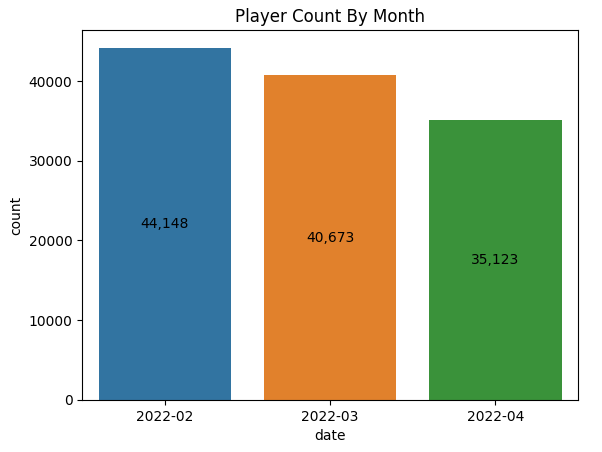 <br>
고객이 왜 떠나는지 알아보자

## 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [3]:
sales_data = pd.read_csv('./data/sales_7.csv')
customer_data = pd.read_csv('./data/customer_7.csv')

In [4]:
customer_data.head()

,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    99845 non-null  object
 1   Name           99845 non-null  object
 2   Nickname       99845 non-null  object
 3   Password       99845 non-null  object
 4   Email          99845 non-null  object
 5   Birth          99845 non-null  object
 6   Gender         99845 non-null  object
 7   C.P.           99845 non-null  object
 8   MobileCompany  99845 non-null  object
 9   OS             99845 non-null  object
dtypes: object(10)
memory usage: 7.6+ MB


총 10개의 열, 99485개의 행이 있다. Null값도 없다!

### 지금까지의 데이터는 3월까지의 데이터이므로 별도로 관리한다.

In [6]:
# sales_data와 customer_data를 Customer_ID열을 기준으로 합치고 customer_03 변수에 할당
customer_03 = pd.merge(sales_data, customer_data, on="Customer_ID")
customer_03.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android


### 4월분 customer data를 한 번 살펴보자

In [7]:
customer_04 = pd.read_csv("./data/customer_04_7.csv")
customer_04.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-03-12,2022-04-03,MineGround,play,19900.0,cupiditate206,우은정,tempora,********,jangsugja@ijijang.com,1987-05-31,female,01x9-2x483-x1x2x,SKT,Android
1,2022-01-25,2022-04-03,MineGround,play,0.0,quis973,박지아,unde,********,gimjieun@yuhanhoesa.com,2000-01-24,male,01x9-4x193-x4x2x,KT,Android
2,2022-01-20,2022-04-02,SoccerManager,play,49900.0,ex368,김하윤,animi,********,jangyeongil@gimcoe.org,1984-05-16,male,01x9-1x376-x1x2x,MVNO,Android
3,2022-01-18,2022-04-04,SoccerManager,play,0.0,labore792,최경자,asperiores,********,jangjeongsig@ju.com,1984-02-21,female,01x9-6x056-x4x5x,SKT,iOS
4,2022-02-11,2022-04-26,SoccerManager,play,900.0,quibusdam041,류민재,fugit,********,cgang@jusighoesa.com,2004-11-06,female,01x9-6x314-x5x1x,MVNO,iOS


In [8]:
customer_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35123 entries, 0 to 35122
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   install        35123 non-null  object 
 1   Time_stamp     35123 non-null  object 
 2   Game_Name      35123 non-null  object 
 3   Status         35123 non-null  object 
 4   Payment        35123 non-null  float64
 5   Customer_ID    35123 non-null  object 
 6   Name           35123 non-null  object 
 7   Nickname       35123 non-null  object 
 8   Password       35123 non-null  object 
 9   Email          35123 non-null  object 
 10  Birth          35123 non-null  object 
 11  Gender         35123 non-null  object 
 12  C.P.           35123 non-null  object 
 13  MobileCompany  35123 non-null  object 
 14  OS             35123 non-null  object 
dtypes: float64(1), object(14)
memory usage: 4.0+ MB


4월 고객 데이터는 sales data도 합쳐져 있다. 전체 행은 총 35123개이다.

### 3월 데이터와 4월 데이터를 합치고 월별로 어떤 변화가 있었는지 살펴보자

In [9]:
# total_sales_data를 만들고 3월과 4월 데이터를 합치기
total_sales_data = pd.concat([customer_03, customer_04])

# total_sales_data 확인하기
total_sales_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-01-08,2022-02-05,MineGround,play,4900.0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,2022-01-05,2022-02-17,MineGround,play,29900.0,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,2022-01-29,2022-02-06,MineGround,play,4900.0,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,2022-01-09,2022-02-05,MineGround,play,900.0,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,2022-01-08,2022-02-01,MineGround,play,900.0,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35118,2022-01-31,2022-04-29,MineGround,play,0.0,recusandae058,김지민,alias,********,sujingim@ibag.net,1984-08-03,female,01x9-0x111-x9x3x,SKT,iOS
35119,2022-03-23,2022-04-27,MineGround,play,0.0,ullam594,권도현,ullam,********,isangho@yuhanhoesa.kr,1991-01-07,male,01x9-3x090-x2x2x,LGU,iOS
35120,2022-01-27,2022-04-21,MineGround,play,0.0,occaecati392,박건우,rem,********,gojunhyeog@heogangi.com,1987-08-22,male,01x9-7x249-x8x2x,SKT,iOS
35121,2022-01-17,2022-04-26,MineGround,play,0.0,iste926,장민재,earum,********,gimhyeonjun@ju.org,2005-10-14,male,01x9-0x450-x8x0x,KT,iOS


In [10]:
# total_sales_data 정보 확인하기
total_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134968 entries, 0 to 35122
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   install        134968 non-null  object 
 1   Time_stamp     134968 non-null  object 
 2   Game_Name      134968 non-null  object 
 3   Status         134968 non-null  object 
 4   Payment        134968 non-null  float64
 5   Customer_ID    134968 non-null  object 
 6   Name           134968 non-null  object 
 7   Nickname       134968 non-null  object 
 8   Password       134968 non-null  object 
 9   Email          134968 non-null  object 
 10  Birth          134968 non-null  object 
 11  Gender         134968 non-null  object 
 12  C.P.           134968 non-null  object 
 13  MobileCompany  134968 non-null  object 
 14  OS             134968 non-null  object 
dtypes: float64(1), object(14)
memory usage: 16.5+ MB


지금까지 수집된 데이터는 총 134968건이다.

### 실제 플레이를 하고 있는 고객들을 정의하고 분석을 진행하자

In [11]:
# total_sales_data의 Status 열 값이 play인 행들만 골라 player_data 변수로 정의
player_data = total_sales_data.loc[total_sales_data["Status"] == "play"]

# player_data의 date열을 만들고, player_data의 Time_stamp 값 중 앞에서 7번째 값까지 입력
player_data.loc[:, "date"] = player_data["Time_stamp"].apply(lambda x: x[:7])
# player_data["date"] = player_data["Time_stamp"].str[:7]

# player_data의 head 값 확인
player_data.head()

C:\Users\Soyeong\AppData\Local\Temp\ipykernel_15108\2959676488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.loc[:, "date"] = player_data["Time_stamp"].apply(lambda x: x[:7])


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,date
0,2022-01-08,2022-02-05,MineGround,play,4900.0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900.0,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900.0,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900.0,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900.0,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android,2022-02


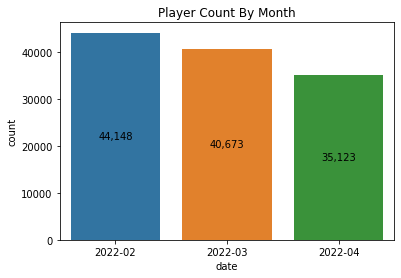

In [12]:
# 월별 Player수 변화 시각화
ax = sns.countplot(data=player_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Player Count By Month')
plt.show()

4월에도 역시 고객이 줄어드는 추세를 보인다. 저번 분석에서 신규 고객의 수가 줄어든 것이 원인이었고, 이에 대한 대응 전략으로 광고를 수행했다. 광고가 효과가 없었던걸까?

### 이번에는 플레이어들이 지불한 금액을 살펴보자

In [13]:
# player_data의 Payment열의 각 개별값을 date열을 기준으로 집계
grouped = player_data['Payment'].groupby(player_data['date']).sum()
grouped

date
2022-02    80841800.0
2022-03    68361200.0
2022-04    43007400.0
Name: Payment, dtype: float64

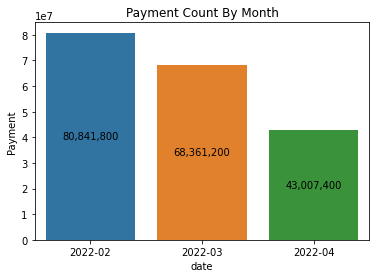

In [14]:
# 집계된 Payment의 값을 시각화
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Count By Month')
plt.show()

4월 매출액은 2월 대비 약 46%p 감소했다.

### 원인을 빨리 찾아야 한다.
먼저 4월 매출액을 게임별로 구분해보자.

In [15]:
# player_data에서 date가 2022-04인 행만 골라서 변수 player_data_04로 할당
player_data_04 = player_data[player_data['date'] == '2022-04']

# 4월의 Payment값을 Game_Name을 기준으로 집계
grouped = player_data_04['Payment'].groupby(player_data_04['Game_Name']).sum()
grouped

Game_Name
MineGround       21809900.0
SoccerManager    21197500.0
Name: Payment, dtype: float64

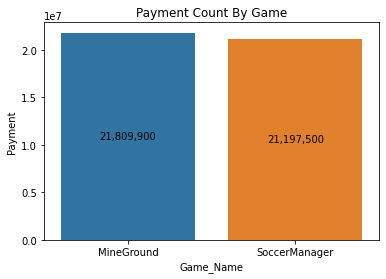

In [16]:
# 집계된 Payment를 시각화
ax = sns.barplot(data=grouped.reset_index(), x='Game_Name', y='Payment')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

큰 차이가 없어보인다.

### 이번에는 일자별로 구분해보자

In [17]:
# 4월의 Payment값을 Game_Name, 일자별로 집계
grouped = player_data_04['Payment'].groupby([player_data_04['Time_stamp'], player_data_04['Game_Name']]).sum()
grouped.head()

Time_stamp  Game_Name    
2022-04-01  MineGround       2052600.0
            SoccerManager     899700.0
2022-04-02  MineGround       1574200.0
            SoccerManager     618200.0
2022-04-03  MineGround       1603900.0
Name: Payment, dtype: float64

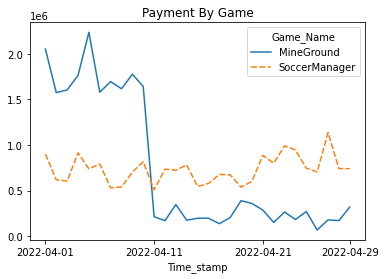

In [18]:
# 집계된 결과를 시각화
ax = sns.lineplot(data=grouped.unstack())
plt.xticks([0,10,20, 28])
plt.title('Payment By Game')
plt.show()

Soccer Manager는 근소하게 매출이 증가하는 반면 Mine Ground는 4월 11일부터 심각한 수준의 매출급락이 보인다. <br>
무슨 문제가 있었던걸까?

### 우선 게임별 사용자 수를 확인해보자

In [19]:
# 4월 일자별 사용자 숫자를 Game_Name을 기준으로 집계
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['Game_Name'])
temp_var.head()

Game_Name,MineGround,SoccerManager
Time_stamp,,
2022-04-01,1256,504
2022-04-02,1209,520
2022-04-03,1230,482
2022-04-04,1215,518
2022-04-05,1221,501


`crosstab()`은 항상 결과를 데이터프레임으로 반환하기 때문에 `groupby()`보다 더 쉽게 사용할 수 있다.

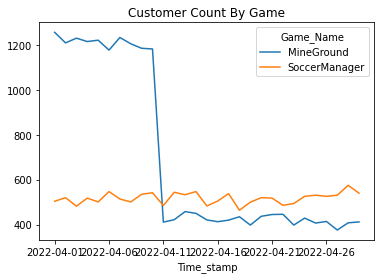

In [20]:
# 집계된 결과를 시각화
temp_var.plot()
plt.title('Customer Count By Game')
plt.show()

Soccer Manager는 패턴을 유지하고 있는데 Mine Ground는 고객 수가 갑자기 큰 폭으로 줄었다. <br>
무슨 문제가 있는지 고객 정보를 기반으로 분석해보자

### Mine Ground의 고객들을 성별, 연령, 통신사, OS 등 다양한 측면에서 확인해보자

In [21]:
# Mine Ground 고객들만 골라내서 player_data_04변수에 할당하기
player_data_04 = player_data_04[player_data_04['Game_Name'] == 'MineGround']

# 성별에 따른 일자 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['Gender'])
temp_var.head()

Gender,female,male
Time_stamp,,
2022-04-01,506,750
2022-04-02,485,724
2022-04-03,485,745
2022-04-04,457,758
2022-04-05,468,753


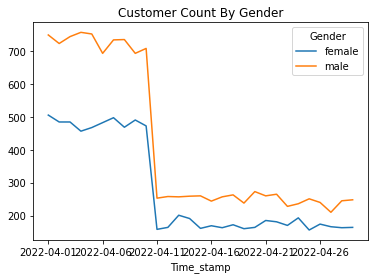

In [22]:
# 집계 결과 시각화하기 
temp_var.plot()
plt.title('Customer Count By Gender')
plt.show()

문제가 되는 4월 11일에 남녀 모두 숫자가 감소했다. <br>
성별에 따른 이용자수는 문제가 없어보인다.

In [23]:
# 연령별 집계를 위해 age열을 만들고 2022년 기준 날짜 계산해서 할당하기
player_data_04['age'] = 2022 - pd.to_numeric(player_data_04['Birth'].str[:4])

# 연령에 따른 일자 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['age'])
temp_var.head()

age,16,17,18,19,20,21,22,23,24,25,...,32,33,34,35,36,37,38,39,40,41
Time_stamp,,,,,,,,,,,,,,,,,,,,,
2022-04-01,15,52,61,37,45,38,38,49,63,53,...,44,61,43,59,55,53,55,46,52,42
2022-04-02,20,40,52,47,52,44,36,61,52,50,...,47,49,43,41,43,46,44,53,48,38
2022-04-03,11,55,48,43,54,51,41,46,46,47,...,59,26,50,50,47,64,40,52,39,43
2022-04-04,10,45,42,48,42,60,38,51,52,48,...,50,51,51,49,55,56,50,53,49,35
2022-04-05,14,49,49,42,51,42,42,43,38,50,...,60,49,53,48,56,52,49,43,48,47


### 연령을 기준으로 10대, 20대, 30대, 40대로 나누어보자

In [24]:
# 연령의 기술통계량 확인하기 
player_data_04['age'].describe()

count    20113.000000
mean        28.851787
std          7.238312
min         16.000000
25%         23.000000
50%         29.000000
75%         35.000000
max         41.000000
Name: age, dtype: float64

최대 40대이니 40대까지만 하면 되겠다

`pd.cut()`을 이용해 구간을 나눈다.

In [25]:
# 세대 구간을 위한 초기값 입력

# 16세이상~20세 미만, 20세 이상~30세 미만 등으로 구분합니다. 
bins = [16, 20, 30, 40, 50] 

# 각 구간의 이름을 정의합니다. 
bins_label = ['10', '20', '30', '40']

# player_data_04에 Generation열을 입력하고, 각 구간별 나이에 맞는 집계 결과를 반영합니다. 
player_data_04['Generation'] = pd.cut(player_data_04['age'], bins,right=False, labels=bins_label)

# 세대에 따른 일자 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['Generation'])
temp_var.head()

Generation,10,20,30,40
Time_stamp,,,,
2022-04-01,165,476,521,94
2022-04-02,159,500,464,86
2022-04-03,157,499,492,82
2022-04-04,145,486,500,84
2022-04-05,154,467,505,95


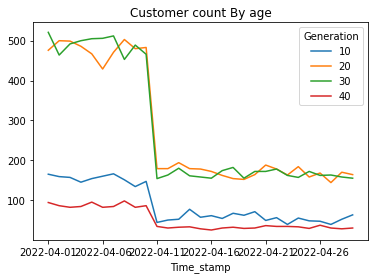

In [26]:
# 집계 결과 시각화하기
temp_var.plot()
plt.title('Customer count By age')
plt.show()

연령에 따른 구분 역시 4월 11일자를 기준으로 공통적으로 감소한다. 연령에 따른 이용자 수도 문제가 없다.

In [27]:
# 통신사를 기준으로 일자별 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['MobileCompany'])
temp_var.head()

MobileCompany,KT,LGU,MVNO,SKT
Time_stamp,,,,
2022-04-01,329,252,140,535
2022-04-02,308,217,108,576
2022-04-03,306,207,124,593
2022-04-04,312,242,101,560
2022-04-05,325,224,130,542


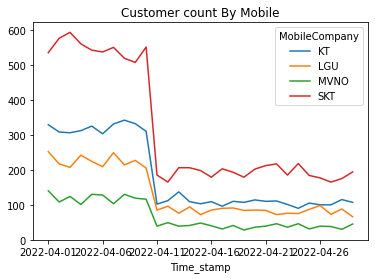

In [28]:
# 집계 결과 시각화하기
temp_var.plot()
plt.title('Customer count By Mobile')
plt.show()

통신사 역시 문제가 없어보인다.

In [29]:
# OS에 따른 일자별 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['OS'])
temp_var.head()

OS,Android,iOS
Time_stamp,,
2022-04-01,744,512
2022-04-02,736,473
2022-04-03,741,489
2022-04-04,745,470
2022-04-05,729,492


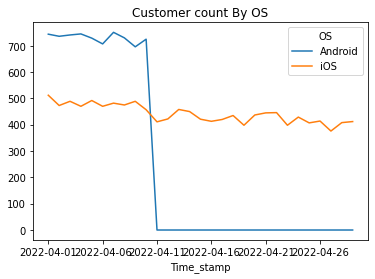

In [30]:
# 집계 결과 확인하기 
temp_var.plot()
plt.title('Customer count By OS')
plt.show()

드디어 원인을 찾았다! 4월 11일을 기준으로 iOS를 사용하는 고객 수는 일정하게 유지되고 있는 반면 Android를 사용하는 고객 수는 0이다. 이는 특별한 기술적 문제가 있는 것이 아니라면 현실적으로 불가능하다.

### 전략 수립 및 실행

지금까지 분석 결과를 통해 다음과 같은 사실을 확인할 수 있었다.
<br>
- 지난 광고전략에도 불구하고 4월의 고객 수는 줄어들었다.
- 특히 Mine Ground의 고객 숫자만 줄어들었다.
- 4월 11일을 기점으로 Android 고객이 '0'이 되었다.

4월 11일에 Android 고객들에게는 무슨일이 있었을까? <br>
현재 우리가 갖고 있는 데이터로는 그 원인을 찾아낼 수 없다. <br>
아마도 Android가 업데이트되면서 우리 게임과의 호환성에 문제가 발생했던것 같다. <br>
<br>
기술적인 문제는 Engineer가 해결할 수 있을것이고, 우리들은 접속하지 못한 고객들을 대상으로 보상전략을 수립하는게 더 중요하다.<br>
적절한 보상전략을 한번 생각해보자. <br>

